In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import random
import os
from tqdm.notebook import tqdm, trange
import time

In [12]:
def shear(img, x_amount, y_amount):
    rows, cols, dim = img.shape
    M = np.float32([[1, x_amount, 0],
                    [y_amount, 1  , 0],
                    [0, 0  , 1]])
    sheared_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
    return sheared_img

In [13]:
def translate(img, x_amount, y_amount):
    left = max(x_amount,0)
    right = max(-x_amount,0)
    top = max(y_amount,0)
    bottom = max(-y_amount,0)
    translated = cv2.copyMakeBorder(img, top=top, bottom=bottom, left=left, right=right, borderType=cv2.BORDER_REFLECT)
    translated = cv2.resize(translated, (img.shape[1], img.shape[0]))
    return translated

In [14]:
def zoom(img, border):
    if border==0:
        return img
    crop_img = img[border:-border, border:-border]
    zoomed = cv2.resize(crop_img, (img.shape[1], img.shape[0]))
    return zoomed

In [15]:
def blur(img, amount):
    return cv2.GaussianBlur(img,(amount,amount),0)

In [16]:
def adj_brightness(img, beta):
    return cv2.convertScaleAbs(img, 1, beta)

In [17]:
def posterize(img, thresh=128):
    _, im2 = cv2.threshold(img, thresh,255,cv2.THRESH_TOZERO)
    return im2

In [18]:
def warp(img, x_amount, y_amount): 
    warped = np.zeros(img.shape, dtype=img.dtype)
    rows, cols, _ = img.shape

    for i in range(rows):
        for j in range(cols):
            offset_x = int(x_amount * math.sin(2 * 3.14 * i / 150))
            offset_y = int(y_amount * math.cos(2 * 3.14 * j / 150))
            if i+offset_y < rows and j+offset_x < cols:
                warped[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
            else:
                warped[i,j] = 0

    return warped    

In [252]:
def randomize_pic(img):
    img = translate(img, x_amount=random.randint(-50,50), y_amount=random.randint(-50,50))
    img = warp(img, random.uniform(0,4), random.uniform(0,4))
    img = shear(img, random.uniform(-0.05,0.05), random.uniform(-0.05,0.05))
    img = adj_brightness(img, random.uniform(0.8,1.6))
    img = zoom(img, random.randint(0,30))
    size = random.randint(20,224)
    img = cv2.resize(img, (size, size))
    img = cv2.resize(img, (224, 224))
    img = blur(img, random.randrange(1,19, step=2))
    return img

In [248]:
def open_gif(path):
    img = cv2.VideoCapture(path)
    ret, image = img.read()
    img.release()
    return image

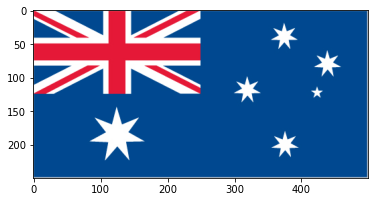

In [250]:
img = open_gif(f"flags/Australia.gif")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

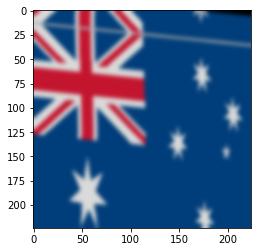

In [260]:
plt.imshow((randomize_pic(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))))

In [261]:
directory = 'flags'
num_flags = 100

with tqdm(total=195*num_flags) as pbar:
    for filename in os.listdir(directory):
        img = open_gif(f"{directory}/{filename}")
        path = f"flag_data/{filename[:-4]}"
        if not os.path.exists(path):
            os.mkdir(path)
        for i in range(num_flags):
            output_file= f"{path}/{filename[:-4]}_{str(i).zfill(4)}.png"
            im2 = randomize_pic(img)
            cv2.imwrite(output_file, im2)
            time.sleep(.1)
            pbar.update(1)

# for filename in os.listdir(directory):
#     img = open_gif(f"{directory}/{filename}")
#     path = f"flag_data/{filename[:-4]}"
#     if not os.path.exists(path):
#         os.mkdir(path)
#     for i in trange(num_flags):
#         output_file= f"{path}/{filename[:-4]}_{str(i).zfill(4)}.png"
#         im2 = randomize_pic(img)
#         cv2.imwrite(output_file, im2)
#         time.sleep(.1)

  0%|          | 0/19500 [00:00<?, ?it/s]